In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Homework 2.2 - Heat Transfer

Use the finite differential method to solve a heat transfer equation, given by

$$ \frac{{\partial T}}{{\partial t}} = k\frac{{{\partial ^2}T}}{{\partial {x^2}}} $$

where $T(t, x)$ is the temperature distribution function.

Solve the equation for $x$ between 0 and 1. At $x=0$ the temperature varies as $T(t,0)=sin(10t)$ and at At $x=1$ the temperature varies as $T(t,0)=e^{ - 100 (t - 0.15)^2}$.

Make the animated clip of the temperature distribution function evolution. Pick appropriate time range.

$$
    T(x,t)
$$
$$
    T=0, T(0,t)=sin(10t)
$$
$$
    T=1, T(1,t)=e^{-100 (t - 0.15)^2}
$$

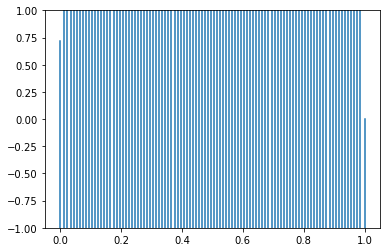

In [2]:
# Set up an array of Tx0
N = 100
L = 1
x = np.linspace(0, L, num=N + 1, endpoint=True)
Tx0 = 0*x

Told = Tx0
# Set up initial condition for the time derivative at t = 0
dTx0 = np.zeros(N + 1)

dt = 0.001 # Set up time step size
dh = L / N # Spatial step size
k = 0.2
eps = (k*dt) / dh**2 # dt = eta, dh = delta

Txj = np.zeros(N + 1)

TAll = np.array([Txj])
fig1 = plt.figure()
l = plt.plot(x, Txj)
axes = plt.gca()
axes.set_ylim([-1, 1])

for j in range(200): # j = t
    Tnew = np.zeros(N+1)
    Tnew[0] = np.sin(10*j)
    Tnew[-1] = np.exp(-100*(j-0.15)**2)
    for i in np.linspace(1, N-1, N-1, dtype=int): # i = x
        Tnew[i] = eps*(Txj[i+1] - 2*Txj[i] + Txj[i-1]) + Txj[i]
    Told = Txj
    Txj = Tnew
    TAll = np.vstack([TAll, Tnew])

def update_line(num, line):
    line.set_data(x, TAll[num])
    return line,
        
line_ani = animation.FuncAnimation(fig1, update_line, 200, fargs=(l), interval=20, blit=True)
writergif = animation.PillowWriter(fps=30)
line_ani.save('Heat-Transfer.gif', writer=writergif)
plt.show()